In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as pp
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import time

In [2]:
# Loading the cleaned dataset from the csv file using pandas
data = pd.read_csv('CleanedData.csv', header=0)

#import columns 
columns = data.columns
X = data[columns[0:-1]]

In [3]:
#find and use median value as a binary classifier for Chance of Admission
median_value = data["Chance of Admit"].median()
for i in range(len(data["Chance of Admit"])):
    if data.loc[i, "Chance of Admit"] >= 0.73:
        data.loc[i, "Chance of Admit"] = 1
    else:
        data.loc[i, "Chance of Admit"] = 0

In [6]:
y = data["Chance of Admit"]
print('Class labels:', np.unique(X))
print('Class labels:', np.unique(y))

Class labels: [  0.     1.     1.5    2.     2.5    3.     3.5    4.     4.5    5.
   6.     7.     7.2    7.25   7.3    7.34   7.36   7.4    7.43   7.46
   7.5    7.56   7.6    7.64   7.65   7.66   7.67   7.68   7.7    7.8
   7.84   7.86   7.87   7.88   7.89   7.9    7.92   7.95   7.97   7.98
   8.     8.01   8.02   8.03   8.04   8.06   8.07   8.09   8.1    8.12
   8.13   8.14   8.15   8.16   8.17   8.18   8.2    8.21   8.22   8.23
   8.24   8.25   8.26   8.27   8.28   8.3    8.32   8.33   8.34   8.36
   8.37   8.4    8.42   8.43   8.44   8.45   8.46   8.47   8.48   8.49
   8.5    8.52   8.53   8.54   8.55   8.56   8.57   8.6    8.62   8.64
   8.65   8.66   8.67   8.68   8.69   8.7    8.71   8.73   8.74   8.75
   8.76   8.77   8.78   8.79   8.8    8.83   8.84   8.85   8.87   8.88
   8.89   8.9    8.92   8.94   8.96   8.97   8.98   9.     9.01   9.02
   9.04   9.05   9.06   9.07   9.08   9.1    9.11   9.12   9.13   9.14
   9.15   9.16   9.17   9.18   9.19   9.2    9.22   9.23   9.24   

In [5]:
#split data 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [7]:
# Standardize the features: Power Transformer works best b/c
# it maintained spacial relationships b/w data & made the features
# more Gaussian distributed
scaler = pp.PowerTransformer()
#scaler = pp.StandardScaler()
#scaler = pp.MaxAbsScaler()
#scaler = pp.RobustScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

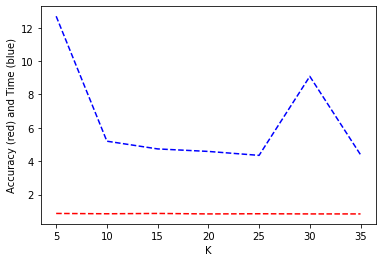

In [8]:
# K-nearest neighbors
#tested different metrics, found manhattan to be best for the data (but only slightly better than euclidean)
knn_k = [5, 10, 15, 20, 25, 30, 35]
res_pred = []
res_times = []
for i in knn_k:
    t_b = time.perf_counter()
    knn = KNeighborsClassifier(n_neighbors=i, metric='manhattan', weights='distance')
    knn.fit(X_train_std, y_train)
    y_pred = knn.predict(X_test_std)
    res_pred.append(accuracy_score(y_test, y_pred))
    t_e = time.perf_counter()
    res_times.append((t_e - t_b)*1000)
plt.plot(knn_k, res_pred, 'r--', knn_k, res_times, 'b--')
plt.xlabel('K')
plt.ylabel('Accuracy (red) and Time (blue)')
plt.show()

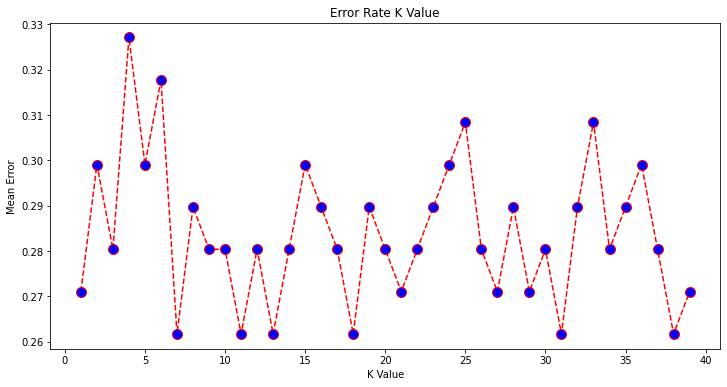

In [9]:
# Calculating error for K values between 1 and 40
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [10]:
# Best result given by n = 15, metric = 'manhattan', weights = 'distance'
knn_optimal = KNeighborsClassifier(n_neighbors=15, metric='manhattan', weights='distance')
knn_optimal.fit(X_train_std, y_train)
y_optimal_pred = knn_optimal.predict(X_test_std)
print("KNN Accuracy: {}".format(accuracy_score(y_test, y_optimal_pred)))
print("Metrics: {}".format(classification_report(y_test, y_optimal_pred)))

KNN Accuracy: 0.8691588785046729
Metrics:               precision    recall  f1-score   support

         0.0       0.84      0.90      0.87        52
         1.0       0.90      0.84      0.87        55

    accuracy                           0.87       107
   macro avg       0.87      0.87      0.87       107
weighted avg       0.87      0.87      0.87       107

